# In this Kernel we will modify the DE algorithm codes. 
### Here you may use the DE algorithm along with side_objective function for your optimization.

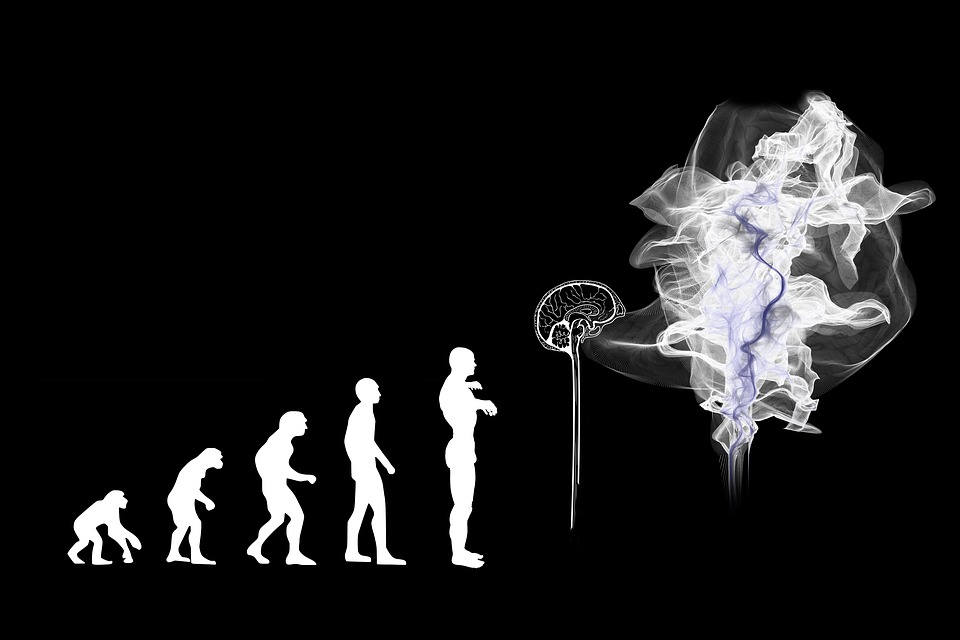
ref:https://www.entrepreneur.com/article/333392

### Import some libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Define the main objective function and side objective function.
#### you may add more side objective functions later and introude it to the DE algorithm.

In [2]:
def fobj(x):
    obj = (x[0]**2) / 2
    return obj

def side_obj_1(x):
    side_obj_1 = (x[0]**3) 
    return side_obj_1

### Here we define the DE algorithm. The main DE algorithm codes were written by Pablo R. Mier. please check out main codes at https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/#

### here I will  change the codes little bit so the main codes can accept and consider the side objective function.

In [3]:
def De_Algorithm_new(fobj, side_obj_1, bounds, mut=0.8, crossp=0.7, popsize=100, its=1000):

    def generate_candidate(fobj, side_obj_1, bounds):
    
        cond = True
        while cond == True:

            dimensions = len(bounds)
            pop = np.random.rand(1, dimensions)
            min_b, max_b = np.asarray(bounds).T
            diff = np.fabs(min_b - max_b)
            pop_denorm = min_b + pop * diff
            # calculate the fitness using fitness function and save it into the fitness parameter
            fitness = np.asarray([fobj(ind) for ind in pop_denorm])
            # calculate the side objective function and save it into the side object_1 parameter
            side_obj_1_fitness = np.asarray([side_obj_1(ind) for ind in pop_denorm])
            #evaluate the side objective function and filter those candidates
            #that are not satisfied the side_objective function.
            # Here we use side objective function and we want to make sure that the DE performs evolution on those candidates 
            # that is between 900 and 1000 values generated by side objective function.
            if side_obj_1_fitness[0] < 1000 and side_obj_1_fitness[0] > 900:
                cond = False
    #             print('candidate = ', pop_denorm)

    #     print('fitness = ', fitness[0]), print('side_obj_1_fitness = ', side_obj_1_fitness[0])
        return pop[0], pop_denorm[0]

    dimensions = len(bounds)
    pop_denorm = np.empty([dimensions])
    pop = np.empty([dimensions])

    for i in range(0, (popsize-1)):
        #pop[0], pop_denorm[0]
        ans1, ans2 = generate_candidate(fobj, side_obj_1, bounds)
        
        pop_denorm = np.vstack([pop_denorm,ans2])
        pop = np.vstack([pop,ans1])

    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff

    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    #Sub_Objective function are evaluated at the following.
    side_obj_1_fitness = np.asarray([side_obj_1(ind) for ind in pop_denorm])
    
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]

    for i in range(its):

        for j in range(popsize):

            trial_denorm, trial = gene_trial_in_range(popsize, j, mut, dimensions, crossp, pop, min_b, diff)
            # Objective function is evaluated at the following.
            f = fobj(trial_denorm)
            # Sub_Objective function is evaluated at the following.
            f1 = side_obj_1(trial_denorm)

            if f < fitness[j] and f1 < 10000000:

                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
                    
#         yield best, fitness[best_idx]
        yield min_b + pop * diff, fitness, best_idx

### Define a function that generates trials in range.

In [4]:
def gene_trial_in_range(popsize, j, mut, dimensions, crossp, pop, min_b, diff):
    
    cond = True
    while cond == True:
        
        idxs = [idx for idx in range(popsize) if idx != j]
        a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
        mutant = np.clip(a + mut * (b - c), 0, 1)
        cross_points = np.random.rand(dimensions) < crossp
        if not np.any(cross_points):
            cross_points[np.random.randint(0, dimensions)] = True

        trial = np.where(cross_points, mutant, pop[j])
        trial_denorm = min_b + trial * diff
        cond = False

    return trial_denorm, trial

In [5]:
bounds = [(-10, 10)]
res = De_Algorithm_new(fobj, side_obj_1, bounds,mut=0.7, crossp=0.8, popsize=5, its=4)
res = list(res)
res[-1]

(array([[9.71347573],
        [9.69980814],
        [9.72554979],
        [9.69181503],
        [9.67379587]]),
 array([47.1758054 , 47.04313899, 47.29315934, 46.96563926, 46.79116331]),
 4)